In [1]:
# "print" working directory
!pwd

/Users/nazmulahasan/Desktop/Professional/Data Science Course/Data-Science-Social-Justice-main/notebooks/module02


In [2]:
import os
# We include two ../ because we want to go two levels up in the file structure
os.chdir("../../data")

In [3]:
!pwd

/Users/nazmulahasan/Desktop/Professional/Data Science Course/Data-Science-Social-Justice-main/data


In [4]:
list_of_files = os.listdir()
print (list_of_files)

['.mapping_police_violence.csv.icloud', 'fatal-police-shootings-data.csv', 'titanic.csv', '.aita_sub_top_sm.csv.icloud', '.aita_sub_top_sm_lemmas.csv.icloud', 'ukraine.csv']


In [5]:
# Import the pandas package
import pandas as pd 


# Read the csv file
df = pd.read_csv('ukraine.csv')

In [6]:
df.shape

(88764, 18)

In [7]:
df.head()

,idint,idstr,created,self,nsfw,author,title,url,selftext,score,subreddit,distinguish,textlen,num_comments,flair_text,flair_css_class,augmented_at,augmented_count
0,13054757,t3_7rt45,1232688225,0,0,nikitos2009,Лучший политический ресурс в Украине,http://pepper.at.ua/,NaN,0,ukraine,NaN,0,0,NaN,NaN,NaN,NaN
1,13072291,t3_7s6n7,1232834472,1,0,OlehM,Dr,NaN,[removed],1,ukraine,NaN,9,0,NaN,NaN,NaN,NaN
2,13093545,t3_7sn1l,1233019738,0,0,nikitos2009,Основы гармонии украинства с московством,http://pepper.at.ua/publ/8-1-0-30,NaN,1,ukraine,NaN,0,0,NaN,NaN,NaN,NaN
3,13118896,t3_7t6ls,1233182615,0,0,nikitos2009,Служба Бандеризации Украины выясняет кто убил ...,http://pepper.at.ua/publ/8-1-0-34,NaN,1,ukraine,NaN,0,0,NaN,NaN,NaN,NaN
4,13238506,t3_7vqwa,1234081946,0,0,ger4antche,amzek.blogspot.com,http://amzek.blogspot.com,NaN,0,ukraine,NaN,0,1,NaN,NaN,NaN,NaN


In [8]:
# This allows you to quickly see which columns you have
list(df)

['idint',
 'idstr',
 'created',
 'self',
 'nsfw',
 'author',
 'title',
 'url',
 'selftext',
 'score',
 'subreddit',
 'distinguish',
 'textlen',
 'num_comments',
 'flair_text',
 'flair_css_class',
 'augmented_at',
 'augmented_count']

In [9]:
# remove certain columns because they are unnecessary
df = df.drop(['self', 'url', 'subreddit', 'augmented_at', 'augmented_count'], axis=1)

df.head()

,idint,idstr,created,nsfw,author,title,selftext,score,distinguish,textlen,num_comments,flair_text,flair_css_class
0,13054757,t3_7rt45,1232688225,0,nikitos2009,Лучший политический ресурс в Украине,NaN,0,NaN,0,0,NaN,NaN
1,13072291,t3_7s6n7,1232834472,0,OlehM,Dr,[removed],1,NaN,9,0,NaN,NaN
2,13093545,t3_7sn1l,1233019738,0,nikitos2009,Основы гармонии украинства с московством,NaN,1,NaN,0,0,NaN,NaN
3,13118896,t3_7t6ls,1233182615,0,nikitos2009,Служба Бандеризации Украины выясняет кто убил ...,NaN,1,NaN,0,0,NaN,NaN
4,13238506,t3_7vqwa,1234081946,0,ger4antche,amzek.blogspot.com,NaN,0,NaN,0,1,NaN,NaN


In [10]:
# Select all rows that don't have 'removed' or 'deleted'
df = df.loc[~df['selftext'].isin(['[removed]', '[deleted]' ]),:]
df.shape

(73414, 13)

In [11]:
# remove 'selftext' rows that are empty
df = df.dropna(subset=['selftext'])

In [12]:
df.shape

(16665, 13)

In [13]:
df.head()

,idint,idstr,created,nsfw,author,title,selftext,score,distinguish,textlen,num_comments,flair_text,flair_css_class
35,26781072,t3_fy0eo,1299351508,0,margys,"Мам, а когда я выросту, ты постареешь?...",Сегодня моя золотая птичка снова задалась вопр...,0,NaN,204,0,NaN,NaN
36,26795140,t3_fyb9g,1299397232,0,pozhaluista,Does the /r/ Ukraine have anyone here? Hello?,Seems quiet.,10,NaN,13,24,NaN,NaN
50,29482904,t3_hjx5k,1306343697,0,visarun,Does immigration in Simferpol check whether th...,I have stayed 70 days and then 80 days out of ...,0,NaN,223,1,NaN,NaN
51,29608809,t3_hmmax,1306639850,0,[deleted],Tickets to Ukraine from Seoul?,Hi everyone. I'd like to visit Ukraine for th...,2,NaN,281,0,NaN,NaN
62,33263382,t3_jsy6u,1314200067,0,lsakbaetle3r9,looking for someone,had a friend who moved to my town ~4-5 years a...,3,NaN,386,1,NaN,NaN


In [14]:
# remove 'selftext' posts that have language other than English
df = df[df['selftext'].map(lambda x: x.isascii())]

In [15]:
df.shape

(12421, 13)

In [16]:
df.head()

,idint,idstr,created,nsfw,author,title,selftext,score,distinguish,textlen,num_comments,flair_text,flair_css_class
36,26795140,t3_fyb9g,1299397232,0,pozhaluista,Does the /r/ Ukraine have anyone here? Hello?,Seems quiet.,10,NaN,13,24,NaN,NaN
50,29482904,t3_hjx5k,1306343697,0,visarun,Does immigration in Simferpol check whether th...,I have stayed 70 days and then 80 days out of ...,0,NaN,223,1,NaN,NaN
51,29608809,t3_hmmax,1306639850,0,[deleted],Tickets to Ukraine from Seoul?,Hi everyone. I'd like to visit Ukraine for th...,2,NaN,281,0,NaN,NaN
62,33263382,t3_jsy6u,1314200067,0,lsakbaetle3r9,looking for someone,had a friend who moved to my town ~4-5 years a...,3,NaN,386,1,NaN,NaN
64,34553372,t3_kkljw,1316449514,0,[deleted],[Ukraine] Can you tell me what my surname means?,Hey /r/ukraine! I am trying to connect with m...,6,NaN,381,17,NaN,NaN


In [17]:
#number of unique users
print (df.iloc[:,4].nunique())

8723


In [18]:
#frequency by user
frequency = df['author'].value_counts()

In [19]:
#top 50 users
frequency.head(50)

[deleted]               167
iceman530                33
TheRealMykola            32
redpillbjj               30
unknown_wtc              27
arleitiss                26
shadowb3astxx            25
snaxks1                  25
tgromy                   24
Motor-Ad-8858            22
koyanis                  21
Accomplished-Car-779     20
ammofordays              20
JupiterQuirinus          20
jediprime74              20
dmytronalyvaiko          18
prayyboii                18
eff-snarf                17
globustr                 17
user00067                16
EoghanMuzyka             16
samuraipenguin123        16
Jesuismieux412           15
Notagelding              15
ImPlayingTheSims         15
Key_Brother              14
FenixWater75             14
Space_Lion2077           14
Futurist110              13
h6story                  13
AllAboutRussia           13
noriumiego               13
MerryPrankster1967       13
cccbig                   12
ChriskiV                 12
wogwe               

In [20]:
#average number of words in selftext
count = df['selftext'].str.split().str.len()
print (count)

36         2
50        42
51        51
62        80
64        71
        ... 
88729     30
88736    103
88747      1
88758    309
88761     12
Name: selftext, Length: 12421, dtype: int64


In [21]:
count.mean()
count.sum()

926390

In [22]:
# total number of characters in 'selftext'

characters_count = df.selftext.str.len()
print (characters_count)

36         13
50        223
51        281
62        386
64        381
         ... 
88729     151
88736     561
88747      25
88758    1797
88761      70
Name: selftext, Length: 12421, dtype: int64


In [23]:
characters_count.sum()

5685111

In [24]:
#see how many URLs in the dataframe

df[df.apply(lambda row: row.astype(str).str.contains('http', case=False).any(), axis=1)]

,idint,idstr,created,nsfw,author,title,selftext,score,distinguish,textlen,num_comments,flair_text,flair_css_class
85,39727193,t3_nnhp5,1324611290,0,alanita,Need help with deruny,Hi r/ukraine!\n\nI wanted to make some deruny ...,7,NaN,772,3,NaN,NaN
94,41466794,t3_oorze,1327064082,0,wormonline,Can anybody help me with some info regarding a...,"Dear Ukrainian redditors,\n\nI'm looking at al...",7,NaN,1219,2,NaN,NaN
100,42205280,t3_p4lsw,1328022978,0,andriyko,Ukrainian translation of Reddit,"I've just started Ukrainian translation, but w...",1,NaN,461,0,NaN,NaN
122,44185890,t3_qb21u,1330501191,0,Distemper,Greetings! r/Ukraine i need your help!,After seeing this video on Youtube [Katy Perry...,1,NaN,462,0,NaN,NaN
132,45367728,t3_r0dyo,1331955389,0,moscheles,"Baginya versus the ""actual persons"".",+ .\n\n+ http://imgur.com/gallery/UZT6G\n\n+ h...,0,NaN,84,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88655,1773184767,t3_tbpi4f,1647003237,0,BountyMounty,Civic Duties &amp; Victory Gardens,There are small things that the home front did...,21,NaN,954,1,Discussion,NaN
88679,1773200782,t3_tbpuha,1647004336,0,kernals12,Ukraine Needs Ground-Based Air Defenses Way Mo...,[https://www.thedrive.com/the-war-zone/44673/u...,145,NaN,541,31,Discussion,NaN
88694,1773209431,t3_tbq15j,1647004939,0,Deegedeege,Captured Russian soldiers - we will be dead if...,[https://www.nzherald.co.nz/world/russia-ukrai...,176,NaN,296,90,News,ukraine-news
88712,1773221887,t3_tbqarj,1647005815,0,girllawyer,Now Putin bombs a disabled care home: Ukrainia...,A disabled care home with 330 residents in th...,174,NaN,1449,23,News,ukraine-news


In [25]:
#remove URLs from 'title' and 'selftext' columns 
df['title'] = df['title'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df['selftext'] = df['selftext'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

In [26]:
# run the http search again to see if the previous code worked

df[df.apply(lambda row: row.astype(str).str.contains('http', case=False).any(), axis=1)]

,idint,idstr,created,nsfw,author,title,selftext,score,distinguish,textlen,num_comments,flair_text,flair_css_class
36487,1755310162,t3_t12dzm,1645790500,0,mrbill1234,Is this a way regular netizens can protest? Bl...,"Ok, easy to get around via VPN etc - but i'm t...",26,NaN,1148,10,NaN,NaN
70826,1763828408,t3_t64ypk,1646350701,0,OneLostOstrich,Which news sources are people using to stay up...,I've found several European channels are bette...,27,NaN,239,41,Russian-Ukrainian War,NaN


In [27]:
#the number of characters in the dataframe also decreased - which shows the code worked
characters_count = df.selftext.str.len()
characters_count.sum()

5196453

In [28]:
df[df.apply(lambda row: row.astype(str).str.contains('’', case=False).any(), axis=1)]

,idint,idstr,created,nsfw,author,title,selftext,score,distinguish,textlen,num_comments,flair_text,flair_css_class
10845,637763839,t3_ajphq7,1548426222,0,Oinvest1,Guess who’s the first,Major stock markets around the world have expe...,14,NaN,1484,3,NaN,NaN
11588,710511580,t3_br0q8s,1558383475,0,iisirka,Oligarch’s Return Raises Alarm in Ukraine,What are your opinions about Kolomoisky's return?,32,NaN,49,5,NaN,NaN
12725,824007881,t3_dmlcjt,1571945274,0,bensonharriot,Is it true that the police check people’s pass...,I am travelling to Kyiv tomorrow for a stag do...,0,NaN,228,11,NaN,NaN
12753,827425701,t3_domlr9,1572335385,0,Fawwaz121,"Hi, I’m soon moving to Zaporozhzhye City for s...","Also, is it okay to speak in russian or is it ...",5,NaN,59,13,NaN,NaN
12855,839655380,t3_dvwq8k,1573672862,0,sflawton10,"Kolomoisky being Kolomoisky: ""A Ukrainian Bill...",[,1,NaN,170,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85897,1770980728,t3_tae9h4,1646850800,0,Gomengomen,"Ukraine Open to Neutrality, Won’t Yield Territ...",News from [Bloomberg]( after an interview with...,2594,NaN,294,496,News,ukraine-news
86282,1771219972,t3_taje2s,1646864892,0,CoolSwa,What do you think will be the results of tomor...,"Zelensky mentioned today compromises, how like...",134,NaN,105,121,Discussion,NaN
86305,1771240439,t3_tajtvb,1646866118,0,anotherlife01,Putin: ‘I can take Kiev in two weeks if I want’,[,33,NaN,198,68,Discussion,NaN
87297,1772066421,t3_tb1j79,1646927103,0,talentless_hack1,"If Lavrov says Russia hasn’t invaded Ukraine, ...","Recall that during Korea, Russian Migs and Ame...",11432,NaN,222,677,Discussion,NaN


In [29]:
#removing smart apostrophes (’) with straight apostrophes (')

df['selftext'] = df['selftext'].str.replace(r"[\’]", r"'")
df['title'] = df['title'].str.replace(r"[\’]", r"'")

/var/folders/t_/t2ccj0g529gcsgmcxnsjjft00000gn/T/ipykernel_41164/1658922611.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['selftext'] = df['selftext'].str.replace(r"[\’]", r"'")
/var/folders/t_/t2ccj0g529gcsgmcxnsjjft00000gn/T/ipykernel_41164/1658922611.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace(r"[\’]", r"'")


In [30]:
# the previous code worked

df[df.apply(lambda row: row.astype(str).str.contains('’', case=False).any(), axis=1)]
df[df.apply(lambda row: row.astype(str).str.contains("'", case=False).any(), axis=1)]

,idint,idstr,created,nsfw,author,title,selftext,score,distinguish,textlen,num_comments,flair_text,flair_css_class
51,29608809,t3_hmmax,1306639850,0,[deleted],Tickets to Ukraine from Seoul?,Hi everyone. I'd like to visit Ukraine for th...,2,NaN,281,0,NaN,NaN
66,34840777,t3_kqrbd,1316944717,0,darad0,Coming to L'viv this week..,"Any redditors there? I'm not sure which day, p...",6,NaN,79,5,NaN,NaN
67,34901751,t3_ks2d3,1317062040,0,[deleted],Anyone from Kiev here?,I'm new to Reddit),3,NaN,18,22,NaN,NaN
68,35474680,t3_l4cfs,1318010398,0,oaklake,Going to visit Kiev and Chernobyl,Me and two friends are working on a school pro...,6,NaN,595,7,NaN,NaN
83,38935677,t3_n6iyl,1323456841,0,Spitfire_Harold,Post-soviet Ukraine,Hey guys. I'm doing a university paper on sovi...,6,NaN,276,14,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88670,1773198587,t3_tbpssb,1647004185,0,Frigorifico,How many Russian commanders have been killed?,I've seen a lot of news about Russian commande...,41,NaN,249,27,WAR,war
88712,1773221887,t3_tbqarj,1647005815,0,girllawyer,Now Putin bombs a disabled care home: Ukrainia...,A disabled care home with 330 residents in th...,174,NaN,1449,23,News,ukraine-news
88736,1773241344,t3_tbqps0,1647007120,0,Ynwe,My family is likely housing some Ukrainian ref...,Hello from Vienna!! Local Ukrainian church ju...,44,NaN,561,22,Discussion,NaN
88758,1773259473,t3_tbr3rl,1647008258,0,TomThanosBrady,We should not be sympathizing with Russian sol...,In my opinion before you start defending Russi...,39,NaN,1735,11,WAR CRIME,NaN


# Cleaning Data

In [31]:
# Import spaCy - since it was already installed
import spacy
# Load the English preprocessing pipeline
nlp = spacy.load('en_core_web_sm')

In [32]:
# Test: Parse the random 600th reddit post in the dataset — because the first post [0] is too short
parsed_post = nlp(df.selftext.iloc[600])
print(parsed_post)

Hi, I'm from Romania and I'm running a blog about vaccines. My blog is pro vaccination.

According to recent news from Unicef, two case of circulating vaccine-derived poliovirus have been confirmed in Ukraine, very to close to Romania too :).

My question is what is opinion about how Ukraine got into this situation? 

References are welcomed!
PS. I don't want to start a pro-anti vaccines debate, if that is possible.


In [33]:
# Print each sentence in the parsed post
for idx, sentence in enumerate(parsed_post.sents):  
    ##In python, .sents is used for "sentence segmentation" which is present inside spacy. 
    print(f'Sentence {idx + 1}')
    print(sentence)
    print('') #space

Sentence 1
Hi, I'm from Romania and I'm running a blog about vaccines.

Sentence 2
My blog is pro vaccination.



Sentence 3
According to recent news from Unicef, two case of circulating vaccine-derived poliovirus have been confirmed in Ukraine, very to close to Romania too :).



Sentence 4
My question is what is opinion about how Ukraine got into this situation? 



Sentence 5
References are welcomed!


Sentence 6
PS.

Sentence 7
I don't want to start a pro-anti vaccines debate, if that is possible.



In [34]:
# Extract the first 15 items for the following properties of the parsed post

# The token text 
token_text = [token.orth_ for token in parsed_post][:15]   
# Part of speech 
token_pos = [token.pos_ for token in parsed_post][:15]   
# Lemma (or 'dictionary form')
token_lemma = [token.lemma_ for token in parsed_post][:15]
# Stop word? t/f
token_stop = [token.is_stop for token in parsed_post][:15]
# Puncutation? t/f
token_punct = [token.is_punct for token in parsed_post][:15]

# Make a dataframe with these items
pd.DataFrame(zip(token_text, token_pos, token_lemma, token_stop, token_punct),
             columns=['token_text', 'part_of_speech', 'token_lemma', 'token_stop', 'token_punct'])

,token_text,part_of_speech,token_lemma,token_stop,token_punct
0,Hi,INTJ,hi,False,False
1,",",PUNCT,",",False,True
2,I,PRON,I,True,False
3,'m,AUX,be,True,False
4,from,ADP,from,True,False
5,Romania,PROPN,Romania,False,False
6,and,CCONJ,and,True,False
7,I,PRON,I,True,False
8,'m,AUX,be,True,False
9,running,VERB,run,False,False


# Preprocessing all data

In [35]:
import spacy
nlp = spacy.load('en_core_web_sm')
from gensim.models.phrases import Phrases, Phraser

In [36]:
def clean(token):
    """Helper function that specifies whether a token is:
        - punctuation
        - space
        - digit
    """
    return token.is_punct or token.is_space or token.is_digit

def line_read(df, text_col='selftext'):
    """Generator function to read in text from df and get rid of line breaks."""    
    for text in df[text_col]:
        yield text.replace('\n', '')

def remove_URL(df, text_col='selftext'):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", df[text_col])
        
def preprocess(df, text_col='selftext', allowed_postags=['NOUN', 'ADJ']):
    """Preprocessing function to apply to a dataframe."""
    for parsed in nlp.pipe(line_read(df, text_col), batch_size=1000, disable=["tok2vec", "ner"]):
        # Gather lowercased, lemmatized tokens
        tokens = [token.lemma_.lower() if token.lemma_ != '-PRON-'
                  else token.lower_ 
                  for token in parsed if not clean(token)]
        # Remove specific lemmatizations, and words that are not nouns or adjectives
        tokens = [lemma
                  for lemma in tokens
                  if not lemma in ["'s",  "’s", "’"] and not lemma in allowed_postags]
        # Remove stop words
        tokens = [token for token in tokens if token not in spacy.lang.en.stop_words.STOP_WORDS]
        yield tokens

In [37]:
# This may take a while
lemmas = [line for line in preprocess(df)]

In [38]:
lemmas [600]

['hi',
 'romania',
 'running',
 'blog',
 'vaccines',
 'blog',
 'pro',
 'vaccination',
 'according',
 'recent',
 'news',
 'unicef',
 'case',
 'circulating',
 'vaccine',
 'derived',
 'poliovirus',
 'confirmed',
 'ukraine',
 'close',
 'romania',
 '.my',
 'question',
 'opinion',
 'ukraine',
 'got',
 'situation',
 'references',
 'welcomed!ps',
 'want',
 'start',
 'pro',
 'anti',
 'vaccines',
 'debate',
 'possible']

In [39]:
df.reset_index().head(50)


,index,idint,idstr,created,nsfw,author,title,selftext,score,distinguish,textlen,num_comments,flair_text,flair_css_class
0,36,26795140,t3_fyb9g,1299397232,0,pozhaluista,Does the /r/ Ukraine have anyone here? Hello?,Seems quiet.,10,NaN,13,24,NaN,NaN
1,50,29482904,t3_hjx5k,1306343697,0,visarun,Does immigration in Simferpol check whether th...,I have stayed 70 days and then 80 days out of ...,0,NaN,223,1,NaN,NaN
2,51,29608809,t3_hmmax,1306639850,0,[deleted],Tickets to Ukraine from Seoul?,Hi everyone. I'd like to visit Ukraine for th...,2,NaN,281,0,NaN,NaN
3,62,33263382,t3_jsy6u,1314200067,0,lsakbaetle3r9,looking for someone,had a friend who moved to my town ~4-5 years a...,3,NaN,386,1,NaN,NaN
4,64,34553372,t3_kkljw,1316449514,0,[deleted],[Ukraine] Can you tell me what my surname means?,Hey /r/ukraine! I am trying to connect with m...,6,NaN,381,17,NaN,NaN
5,66,34840777,t3_kqrbd,1316944717,0,darad0,Coming to L'viv this week..,"Any redditors there? I'm not sure which day, p...",6,NaN,79,5,NaN,NaN
6,67,34901751,t3_ks2d3,1317062040,0,[deleted],Anyone from Kiev here?,I'm new to Reddit),3,NaN,18,22,NaN,NaN
7,68,35474680,t3_l4cfs,1318010398,0,oaklake,Going to visit Kiev and Chernobyl,Me and two friends are working on a school pro...,6,NaN,595,7,NaN,NaN
8,71,35682905,t3_l8t3t,1318371240,0,Thoning,Looking to rent a house in Kiev area,Me and a group of friends are planning on goin...,3,NaN,230,3,NaN,NaN
9,74,36405173,t3_loaet,1319542723,0,iAmTheDragon-FTFY,Hey there fellow ukrainians!,Does anyone know where i can buy some tickets ...,6,NaN,240,3,NaN,NaN


# Phrase Modeling with `gensim`

In [40]:
# Create bigram and trigram models
bigram = Phrases(lemmas, min_count=10, threshold=100)
trigram = Phrases(bigram[lemmas], min_count=10, threshold=50)  
bigram_phraser = Phraser(bigram)
trigram_phraser = Phraser(trigram)

# Form trigrams
trigrams = [trigram_phraser[bigram_phraser[doc]] for doc in lemmas]

In [41]:
# Join each into a string
trigrams_joined = [' '.join(trigram) for trigram in trigrams]
trigrams_joined[600]

'hi romania running blog vaccines blog pro vaccination according recent news unicef case circulating vaccine derived poliovirus confirmed ukraine close romania .my question opinion ukraine got situation references welcomed!ps want start pro anti vaccines debate possible'

In [42]:
#How many bigrams in total?

len(bigram_phraser.phrasegrams.keys())

133

In [43]:
#the first ten bigrams

list(bigram_phraser.phrasegrams.keys())[:10]

['shed_light',
 'years_ago',
 'thanks_advance',
 'eastern_europe',
 'english_speakers',
 'cross_border',
 'story_short',
 'new_york',
 'e_mail',
 'google_translate']

In [44]:
# Look at trigrams
[trigram for trigram in list(trigram_phraser.phrasegrams.keys()) if trigram.count('_') == 2]

['point_right_direction',
 'long_story_short',
 'air_raid_sirens',
 'air_raid_siren',
 'nuclear_power_plant']

# Saving CSV file of `lemmas`

In [45]:
# Inserting 'lemmas' column next to 'selftext' column
df.insert(loc=7, column='lemmas', value=trigrams_joined)
# Removing empty rows in lemmas
df = df[~df['lemmas'].isin([''])]

In [46]:
# new dataframe head with 'lemmas' column

df.head()

,idint,idstr,created,nsfw,author,title,selftext,lemmas,score,distinguish,textlen,num_comments,flair_text,flair_css_class
36,26795140,t3_fyb9g,1299397232,0,pozhaluista,Does the /r/ Ukraine have anyone here? Hello?,Seems quiet.,quiet,10,NaN,13,24,NaN,NaN
50,29482904,t3_hjx5k,1306343697,0,visarun,Does immigration in Simferpol check whether th...,I have stayed 70 days and then 80 days out of ...,stayed days days days know borispol pretty str...,0,NaN,223,1,NaN,NaN
51,29608809,t3_hmmax,1306639850,0,[deleted],Tickets to Ukraine from Seoul?,Hi everyone. I'd like to visit Ukraine for th...,hi like visit ukraine time looking cheap ticke...,2,NaN,281,0,NaN,NaN
62,33263382,t3_jsy6u,1314200067,0,lsakbaetle3r9,looking for someone,had a friend who moved to my town ~4-5 years a...,friend moved town ~4 years ago.he myspace acce...,3,NaN,386,1,NaN,NaN
64,34553372,t3_kkljw,1316449514,0,[deleted],[Ukraine] Can you tell me what my surname means?,Hey /r/ukraine! I am trying to connect with m...,hey /r ukraine trying connect roots trying fin...,6,NaN,381,17,NaN,NaN


In [47]:
# Save to new csv
df.to_csv('ukraine_lemmas.csv', index=False)

In [48]:
df1 = pd.read_csv('ukraine_lemmas.csv')
df1.head()

,idint,idstr,created,nsfw,author,title,selftext,lemmas,score,distinguish,textlen,num_comments,flair_text,flair_css_class
0,26795140,t3_fyb9g,1299397232,0,pozhaluista,Does the /r/ Ukraine have anyone here? Hello?,Seems quiet.,quiet,10,NaN,13,24,NaN,NaN
1,29482904,t3_hjx5k,1306343697,0,visarun,Does immigration in Simferpol check whether th...,I have stayed 70 days and then 80 days out of ...,stayed days days days know borispol pretty str...,0,NaN,223,1,NaN,NaN
2,29608809,t3_hmmax,1306639850,0,[deleted],Tickets to Ukraine from Seoul?,Hi everyone. I'd like to visit Ukraine for th...,hi like visit ukraine time looking cheap ticke...,2,NaN,281,0,NaN,NaN
3,33263382,t3_jsy6u,1314200067,0,lsakbaetle3r9,looking for someone,had a friend who moved to my town ~4-5 years a...,friend moved town ~4 years ago.he myspace acce...,3,NaN,386,1,NaN,NaN
4,34553372,t3_kkljw,1316449514,0,[deleted],[Ukraine] Can you tell me what my surname means?,Hey /r/ukraine! I am trying to connect with m...,hey /r ukraine trying connect roots trying fin...,6,NaN,381,17,NaN,NaN


# 2. Exploring Texts
## 2-1. Diving Deeper into pandas

In [49]:
!pwd

/Users/nazmulahasan/Desktop/Professional/Data Science Course/Data-Science-Social-Justice-main/data


In [50]:
list_of_files = os.listdir()
print (list_of_files)

['.mapping_police_violence.csv.icloud', 'fatal-police-shootings-data.csv', 'titanic.csv', 'ukraine_lemmas.csv', '.aita_sub_top_sm.csv.icloud', '.aita_sub_top_sm_lemmas.csv.icloud', 'ukraine.csv']


In [51]:
import pandas as pd

In [52]:
df = pd.read_csv('ukraine_lemmas.csv')

In [53]:
df.head(10)

,idint,idstr,created,nsfw,author,title,selftext,lemmas,score,distinguish,textlen,num_comments,flair_text,flair_css_class
0,26795140,t3_fyb9g,1299397232,0,pozhaluista,Does the /r/ Ukraine have anyone here? Hello?,Seems quiet.,quiet,10,NaN,13,24,NaN,NaN
1,29482904,t3_hjx5k,1306343697,0,visarun,Does immigration in Simferpol check whether th...,I have stayed 70 days and then 80 days out of ...,stayed days days days know borispol pretty str...,0,NaN,223,1,NaN,NaN
2,29608809,t3_hmmax,1306639850,0,[deleted],Tickets to Ukraine from Seoul?,Hi everyone. I'd like to visit Ukraine for th...,hi like visit ukraine time looking cheap ticke...,2,NaN,281,0,NaN,NaN
3,33263382,t3_jsy6u,1314200067,0,lsakbaetle3r9,looking for someone,had a friend who moved to my town ~4-5 years a...,friend moved town ~4 years ago.he myspace acce...,3,NaN,386,1,NaN,NaN
4,34553372,t3_kkljw,1316449514,0,[deleted],[Ukraine] Can you tell me what my surname means?,Hey /r/ukraine! I am trying to connect with m...,hey /r ukraine trying connect roots trying fin...,6,NaN,381,17,NaN,NaN
5,34840777,t3_kqrbd,1316944717,0,darad0,Coming to L'viv this week..,"Any redditors there? I'm not sure which day, p...",redditors sure day probably monday tuesday 27.09,6,NaN,79,5,NaN,NaN
6,34901751,t3_ks2d3,1317062040,0,[deleted],Anyone from Kiev here?,I'm new to Reddit),new reddit,3,NaN,18,22,NaN,NaN
7,35474680,t3_l4cfs,1318010398,0,oaklake,Going to visit Kiev and Chernobyl,Me and two friends are working on a school pro...,friends working school project nuclear disaste...,6,NaN,595,7,NaN,NaN
8,35682905,t3_l8t3t,1318371240,0,Thoning,Looking to rent a house in Kiev area,Me and a group of friends are planning on goin...,group friends planning going kiev european cup...,3,NaN,230,3,NaN,NaN
9,36405173,t3_loaet,1319542723,0,iAmTheDragon-FTFY,Hey there fellow ukrainians!,Does anyone know where i can buy some tickets ...,know buy tickets preferably online upcoming go...,6,NaN,240,3,NaN,NaN


In [54]:
# Sort dataframe by highest scores
df.sort_values(by=['score'], ascending=False)[:3]

,idint,idstr,created,nsfw,author,title,selftext,lemmas,score,distinguish,textlen,num_comments,flair_text,flair_css_class
6623,1753516706,t3_szzy5e,1645671618,0,soff_mm,It is an honor to be a Ukrainian at this hour.,We're staying strong. Support the Armed Forces...,staying strong support armed_forces ukraine,48955,NaN,66,2154,NaN,NaN
11272,1766534572,t3_t7qyss,1646540863,0,sharag123,It is almost 7am and the Sun has Risen on the ...,&#x200B;,x200b,33895,NaN,39,531,WAR,war
7494,1755924903,t3_t1fkbr,1645825902,0,Arskaaaaa,Cell number of representative of the Russian M...,[ Removed by reddit on account of violating th...,removed reddit account violating content polic...,21197,NaN,0,266,NaN,NaN


In [55]:
# number of posts with at least 500 net upvotes

df_top = df.loc[df['score'] >= 500, :]
len(df_top)

283

In [56]:
len(df)

11956

In [57]:
df.loc[df['score'] >= 500, ['title','selftext','lemmas','score']]

,title,selftext,lemmas,score
2548,Weird request: any Ukrainian Redditors able to...,Hope this is okay to post here. I'm trying to ...,hope okay post trying buy toy found online ukr...,557
5672,Remember: Record Everything (Video and Photo),If the situation escalates to the point of dir...,situation escalates point direct confrontation...,568
5770,When will Russia invade Ukraine again on a lar...,With a lot of attention being drawn to the sub...,lot attention drawn subject present ultimate b...,13670
6041,To Ukrainian Citizens,"Hello there, as someone from Syria and have su...",hello syria survived decade long war tips fell...,2071
6273,IMPORTANT! Posts disclosing the movement of Uk...,We understand that most people will repost alr...,understand people repost public information po...,1093
...,...,...,...,...
11922,I'm just sick about Mariupol.,I hate Russia with such anger and disgust. To ...,hate russia anger disgust announce humanitaria...,644
11923,Ukraine war: Posts calling for violence agains...,"> Meta, which owns both social networks, has r...",> meta owns social networks reportedly sent em...,507
11932,"The Swedish police send helmets, life jackets,...",OP's 1st botched translation of breaking news....,op 1st botched translation breaking news > swe...,773
11937,Frozen Russian bodies 'left for the dogs' as U...,A shocking TV news report showed frozen Russia...,shocking tv news report showed frozen russian ...,576


In [58]:
# the number of posts with each flair text tag

df.flair_text.value_counts()

Russian-Ukrainian War       1243
Question                    1026
Discussion                   907
News                         230
Request                      170
WAR                          141
Travel                       123
Military                      89
Humor                         45
Russo-Ukrainian War           44
History                       40
Social Media                  40
Media                         35
Moving to Ukraine             26
Shitpost                      18
War Crimes                    18
WAR CRIME                     17
Music                         17
Important                     10
Cuisine                       10
Social media                   8
Photo                          8
Russian Protest                6
Video                          5
Government (Unconfirmed)       5
Unconfirmed                    3
Tweet                          2
ASTARTES                       1
RATE MY BORSHCH!               1
Need help                      1
WAR | Misl

## 2.2 Type-token ratio

In [59]:
# import and compute TTR

def type_token_ratio(tokens):
    """Calculates type-token ratio on tokens."""
    numTokens = len(tokens)
    numTypes = len(set(tokens))
    return numTypes / numTokens

In [60]:
# split the lemmas (string) to a list and then divide them by type of the tokens, resulting in a ratio to measure the complexity of the posts

for text in df['lemmas'][10:15]:
    tokens = text.split()
    print('Text:\n', text)
    print('TTR:', type_token_ratio(tokens), '\n')

Text:
 recently told clubs ukraine song leave hat plays people end stripping club gullible idiot true
TTR: 1.0 

Text:
 need help scavenger hunt need video man pole dance poltava help
TTR: 0.8181818181818182 

Text:
 hey_guys university paper soviet communist legacy ukraine know ukrainians completely shed past nostalgic wondering input sources soviet traits live ukraine today cheers
TTR: 0.9090909090909091 

Text:
 hi r ukraine!i wanted deruny christmas eve saturday wondering kind potatoes kind onions commonly eaten ukraine family contest christmas eve dish culturally accurate possible vote winner dish culture needs accurate i.e. non-"americanized chose deruny accuracy like use particular vegetable types expect grandmother house ukraine recipe working tips adjustments?all advice_appreciated thanks!edit christmas eve tomorrow
TTR: 0.8301886792452831 

Text:
 dad redditor keeping low key alt vagueries asshat certainly love watch world burn send heads 60th birthday year like present genea

# 2.3 Processing and Analyzing Language with `Text()`

In [ ]:
#run to install NLTK, if haven't already

!pip install nltk

In [61]:


tokens = []
for idx, row in enumerate(df['lemmas']):
    # Notice that we put all tokens in the same list
    tokens.extend(row.split(' '))

In [65]:
tokens [250]

'kind'

In [63]:
len(tokens)

396800

In [66]:
import nltk
nltk.download('stopwords')
from nltk.text import Text
ukraine_tokens = Text(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nazmulahasan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Concordances

In [67]:
ukraine_tokens.collocation_list()

[('let', 'know'),
 ('russian', 'soldiers'),
 ('feel', 'like'),
 ('speak', 'russian'),
 ('pro', 'russian'),
 ('russian', 'propaganda'),
 ('best', 'way'),
 ('speak', 'ukrainian'),
 ('russian', 'troops'),
 ('good', 'idea'),
 ('want', 'help'),
 ('trying', 'find'),
 ('russian', 'army'),
 ('russian', 'invasion'),
 ('long', 'time'),
 ('help', 'appreciated'),
 ('ukrainian', 'people'),
 ('wanted', 'ask'),
 ('support', 'ukraine'),
 ('send', 'money')]

In [68]:
# Change input arguments
ukraine_tokens.collocation_list(num=30, window_size=3)

[('let', 'know'),
 ('speak', 'russian'),
 ('russian', 'soldiers'),
 ('speak', 'ukrainian'),
 ('feel', 'like'),
 ('russian', 'propaganda'),
 ('pro', 'russian'),
 ('best', 'way'),
 ('russian', 'troops'),
 ('help', 'appreciated'),
 ('good', 'idea'),
 ('learn', 'ukrainian'),
 ('want', 'help'),
 ('wanted', 'ask'),
 ('long', 'time'),
 ('trying', 'find'),
 ('send', 'money'),
 ('wish', 'best'),
 ('russian', 'invasion'),
 ('ukrainian', 'language'),
 ('russian', 'army'),
 ('oh_oh_oh_oh', 'oh_oh_oh_oh'),
 ('need', 'help'),
 ('usb_usb', 'usb_usb'),
 ('russian', 'forces'),
 ('ukrainian', 'passport'),
 ('support', 'ukraine'),
 ('want', 'know'),
 ('sounds', 'like'),
 ('send', 'message')]

## Word Plotting

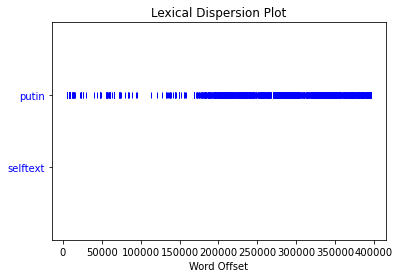

In [70]:
ukraine_tokens.dispersion_plot(["putin", "selftext"])

## Similar Words

In [71]:
ukraine_tokens.similar('putin')

ukraine russia know russian like people want going good country war
ukrainian eu time army probably think guys world far


## Common Context

In [76]:
ukraine_tokens.common_contexts(['putin', 'war'])  

fuck_fuck pro_propaganda support_war think_going russia_want
know_going want_care


## 2.4 Incorporating Time and Creating pre and post 2013 timelines

In [77]:
#new colum with date and time (created_datetime) by converting the created timestamp
df.insert(loc=3, column='created_datetime', value=pd.to_datetime(df['created'], unit='s'))
df.head(3)

,idint,idstr,created,created_datetime,nsfw,author,title,selftext,lemmas,score,distinguish,textlen,num_comments,flair_text,flair_css_class
0,26795140,t3_fyb9g,1299397232,2011-03-06 07:40:32,0,pozhaluista,Does the /r/ Ukraine have anyone here? Hello?,Seems quiet.,quiet,10,NaN,13,24,NaN,NaN
1,29482904,t3_hjx5k,1306343697,2011-05-25 17:14:57,0,visarun,Does immigration in Simferpol check whether th...,I have stayed 70 days and then 80 days out of ...,stayed days days days know borispol pretty str...,0,NaN,223,1,NaN,NaN
2,29608809,t3_hmmax,1306639850,2011-05-29 03:30:50,0,[deleted],Tickets to Ukraine from Seoul?,Hi everyone. I'd like to visit Ukraine for th...,hi like visit ukraine time looking cheap ticke...,2,NaN,281,0,NaN,NaN


In [78]:
#create new variables years — list of years posts were created
years = pd.DatetimeIndex(df['created_datetime']).year
print(years)

Int64Index([2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='created_datetime', length=11956)


In [79]:
df.head(3)

,idint,idstr,created,created_datetime,nsfw,author,title,selftext,lemmas,score,distinguish,textlen,num_comments,flair_text,flair_css_class
0,26795140,t3_fyb9g,1299397232,2011-03-06 07:40:32,0,pozhaluista,Does the /r/ Ukraine have anyone here? Hello?,Seems quiet.,quiet,10,NaN,13,24,NaN,NaN
1,29482904,t3_hjx5k,1306343697,2011-05-25 17:14:57,0,visarun,Does immigration in Simferpol check whether th...,I have stayed 70 days and then 80 days out of ...,stayed days days days know borispol pretty str...,0,NaN,223,1,NaN,NaN
2,29608809,t3_hmmax,1306639850,2011-05-29 03:30:50,0,[deleted],Tickets to Ukraine from Seoul?,Hi everyone. I'd like to visit Ukraine for th...,hi like visit ukraine time looking cheap ticke...,2,NaN,281,0,NaN,NaN


In [80]:
#before 2013
df_2013 = df.loc[(years <= 2013), :]
len(df_2013)

110

In [82]:
#after 2013 & before 2022

df_b2022 = df.loc[(years <= 2022) & (years >=2013), :]
len(df_b2022)

11846

In [83]:
#after 2022
df_a2022 = df.loc[(years >= 2022), :]
len(df_a2022)

6515

In [103]:
# visualize data ###3 different bars + normalized(count -> proportion)
#before 2013
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

#sns.set(rc={'figure.figsize': (7, 5)})

#p = sns.countplot(
    #data=df_2013,
    #x="flair_css_class",) 

#plt.xticks(rotation=70)
#plt.tight_layout()

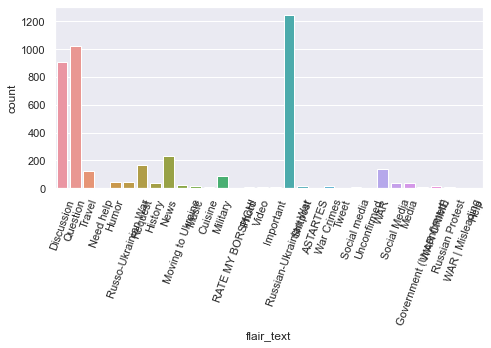

In [87]:
#after 2013 & before 2022
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

sns.set(rc={'figure.figsize': (7, 5)})

p = sns.countplot(
    data=df_b2022,
    x="flair_text",)


plt.xticks(rotation=70)
plt.tight_layout()

In [94]:
df.flair_css_class.value_counts()

ukraine-question        1026
ukraine-discussion       472
ukraine-news             230
ukraine-request          170
war                      143
ukraine-travel           123
ukraine-history           40
ukraine-photo              8
ukraine-social-media       8
ukraine-tweet              2
ukraine-help               1
unconfirmed                1
ukraine-video              1
Name: flair_css_class, dtype: int64

In [97]:
df.flair_css_class.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
11951    ukraine-news
11952             NaN
11953             NaN
11954             NaN
11955             NaN
Name: flair_css_class, Length: 11956, dtype: object>

In [98]:
df.flair_text.value_counts()

Russian-Ukrainian War       1243
Question                    1026
Discussion                   907
News                         230
Request                      170
WAR                          141
Travel                       123
Military                      89
Humor                         45
Russo-Ukrainian War           44
History                       40
Social Media                  40
Media                         35
Moving to Ukraine             26
Shitpost                      18
War Crimes                    18
WAR CRIME                     17
Music                         17
Important                     10
Cuisine                       10
Social media                   8
Photo                          8
Russian Protest                6
Video                          5
Government (Unconfirmed)       5
Unconfirmed                    3
Tweet                          2
ASTARTES                       1
RATE MY BORSHCH!               1
Need help                      1
WAR | Misl

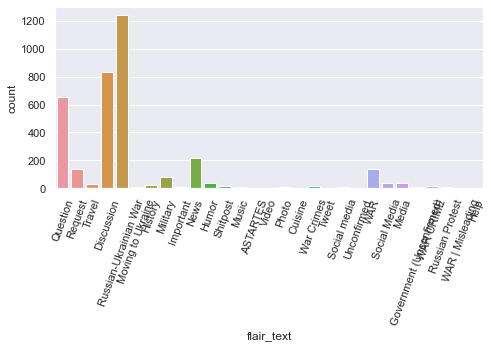

In [99]:
#after 2022
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

sns.set(rc={'figure.figsize': (7, 5)})

p = sns.countplot(
    data=df_a2022,
    x="flair_text",)

plt.xticks(rotation=70)
plt.tight_layout()

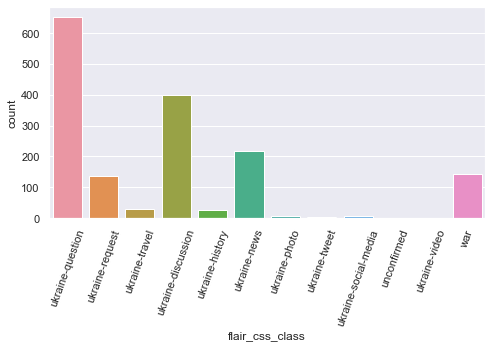

In [104]:
#after 2022
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

sns.set(rc={'figure.figsize': (7, 5)})

p = sns.countplot(
    data=df_a2022,
    x="flair_css_class",)

plt.xticks(rotation=70)
plt.tight_layout()

In [105]:
df_2013.to_csv('df_2013.csv', index=False)
df_b2022.to_csv('df_b2022.csv', index=False)
df_a2022.to_csv('df_a2022.csv', index=False)

# 3. Term Frequency-Inverse Document Frequency (TF-IDF)

In [106]:
%pwd 

'/Users/nazmulahasan/Desktop/Professional/Data Science Course/Data-Science-Social-Justice-main/data'

In [107]:
ukraine = pd.read_csv('ukraine_lemmas.csv')

In [108]:
ukraine.head()

,idint,idstr,created,nsfw,author,title,selftext,lemmas,score,distinguish,textlen,num_comments,flair_text,flair_css_class
0,26795140,t3_fyb9g,1299397232,0,pozhaluista,Does the /r/ Ukraine have anyone here? Hello?,Seems quiet.,quiet,10,NaN,13,24,NaN,NaN
1,29482904,t3_hjx5k,1306343697,0,visarun,Does immigration in Simferpol check whether th...,I have stayed 70 days and then 80 days out of ...,stayed days days days know borispol pretty str...,0,NaN,223,1,NaN,NaN
2,29608809,t3_hmmax,1306639850,0,[deleted],Tickets to Ukraine from Seoul?,Hi everyone. I'd like to visit Ukraine for th...,hi like visit ukraine time looking cheap ticke...,2,NaN,281,0,NaN,NaN
3,33263382,t3_jsy6u,1314200067,0,lsakbaetle3r9,looking for someone,had a friend who moved to my town ~4-5 years a...,friend moved town ~4 years ago.he myspace acce...,3,NaN,386,1,NaN,NaN
4,34553372,t3_kkljw,1316449514,0,[deleted],[Ukraine] Can you tell me what my surname means?,Hey /r/ukraine! I am trying to connect with m...,hey /r ukraine trying connect roots trying fin...,6,NaN,381,17,NaN,NaN


In [109]:
ukraine['lemmas']

0                                                    quiet
1        stayed days days days know borispol pretty str...
2        hi like visit ukraine time looking cheap ticke...
3        friend moved town ~4 years ago.he myspace acce...
4        hey /r ukraine trying connect roots trying fin...
                               ...                        
11951    disabled care home residents town oskil near k...
11952    watching dw news night ticker said km long col...
11953    hello vienna local ukrainian church called wan...
11954    opinion start defending russian soldiers think...
11955                       argument people nato expansion
Name: lemmas, Length: 11956, dtype: object

In [110]:
# create a matrix of word counts (what we just did with CountVectorizer), and immediately transform them into TF-IDF values.
from sklearn.feature_extraction.text import TfidfVectorizer

# Settings that you use for count vectorizer will go here
tfidf_vectorizer = TfidfVectorizer(max_df=0.85,
                                   decode_error='ignore',
                                   stop_words='english',
                                   smooth_idf=True,
                                   use_idf=True,
                                  )

# Fit and transform the texts
tfidf = tfidf_vectorizer.fit_transform(ukraine['lemmas'])

In [111]:
# Place TF-IDF values in a DataFrame
df_tfidf = pd.DataFrame(tfidf.todense(), columns=tfidf_vectorizer.get_feature_names_out().ravel())

In [112]:
df_tfidf.shape

(11956, 28318)

In [113]:
# highest "average" TF-IDF across documents
df_tfidf.sum().sort_values(ascending=False)


ukraine        423.084528
x200b          287.887833
ukrainian      250.940776
know           231.654517
russian        231.615932
                  ...    
deperessing      0.021965
lolnight         0.021965
xxxxxx           0.021965
lolololi         0.021965
lolhe            0.021965
Length: 28318, dtype: float64

In [114]:
df_tfidf.mean().sort_values(ascending=False)

ukraine        0.035387
x200b          0.024079
ukrainian      0.020989
know           0.019376
russian        0.019372
                 ...   
deperessing    0.000002
lolnight       0.000002
xxxxxx         0.000002
lolololi       0.000002
lolhe          0.000002
Length: 28318, dtype: float64

In [118]:
df_tfidf.iloc[9].sort_values(ascending=False)


gogol       0.379140
bordello    0.379140
upcoming    0.309077
concert     0.305947
answered    0.291108
              ...   
fck         0.000000
fcc         0.000000
fc          0.000000
fbi         0.000000
zytnia      0.000000
Name: 9, Length: 28318, dtype: float64

In [119]:
ukraine['selftext'].iloc[9]

'Does anyone know where i can buy some tickets (preferably online) for the upcoming Gogol Bordello concert in Kiev? Most of the websites i found are in ukrainian and none of them answered my emails.       \nThanks a lot and have a great day:)'

In [120]:
#the tfidf value of the 10th post submission
df_tfidf.iloc[9].sort_values(ascending=False).head(20)


gogol         0.379140
bordello      0.379140
upcoming      0.309077
concert       0.305947
answered      0.291108
emails        0.283637
preferably    0.234894
tickets       0.234894
websites      0.209795
buy           0.176407
online        0.175755
great         0.174693
day           0.158042
lot           0.152142
kiev          0.151848
thanks        0.139391
know          0.101994
ukrainian     0.101363
pops          0.000000
popsicle      0.000000
Name: 9, dtype: float64

## TF-IDF before 2013

In [122]:
import os
import pandas as pd

In [123]:
df_2013 = pd.read_csv('df_2013.csv')
df_2013['lemmas']

0                                                  quiet
1      stayed days days days know borispol pretty str...
2      hi like visit ukraine time looking cheap ticke...
3      friend moved town ~4 years ago.he myspace acce...
4      hey /r ukraine trying connect roots trying fin...
                             ...                        
105    hi ago asking language ukraine question husban...
106    hi guys american traveling ukrainian lived arr...
107    hi going lviv visiting family late january tim...
108    interested culture history ukraine family taki...
109    came ukraine visit girlfriend met summer j1 jo...
Name: lemmas, Length: 110, dtype: object

In [124]:
# create a matrix of word counts (what we just did with CountVectorizer), and immediately transform them into TF-IDF values.
from sklearn.feature_extraction.text import TfidfVectorizer

# Settings that you use for count vectorizer will go here
tfidf_vectorizer = TfidfVectorizer(max_df=0.85,
                                   decode_error='ignore',
                                   stop_words='english',
                                   smooth_idf=True,
                                   use_idf=True,
                                  )

# Fit and transform the texts
tfidf_2013 = tfidf_vectorizer.fit_transform(df_2013['lemmas'])

In [126]:
# Place TF-IDF values in a DataFrame
df_tfidf_2013 = pd.DataFrame(tfidf_2013.todense(), columns=tfidf_vectorizer.get_feature_names_out().ravel())

In [127]:
# highest "average" TF-IDF across documents
df_tfidf_2013.sum().sort_values(ascending=False)


ukraine       5.594348
ukrainian     3.530385
know          3.216347
kiev          3.126110
like          2.681550
                ...   
screenshot    0.064593
facebook      0.064593
uses          0.064593
opinion       0.064593
posting       0.064593
Length: 1762, dtype: float64

## TF-IDF 2014-2022

In [129]:
df_b2022 = pd.read_csv('df_b2022.csv')
df_b2022['lemmas']

0        understand half ukraine speaks russian plan le...
1        wondering teach phrases impress tried learn ho...
2        brought wife england years_ago actually wife f...
3        moving ukraine soon living small russian speak...
4                                                      far
                               ...                        
11841    disabled care home residents town oskil near k...
11842    watching dw news night ticker said km long col...
11843    hello vienna local ukrainian church called wan...
11844    opinion start defending russian soldiers think...
11845                       argument people nato expansion
Name: lemmas, Length: 11846, dtype: object

In [130]:
# create a matrix of word counts (what we just did with CountVectorizer), and immediately transform them into TF-IDF values.
from sklearn.feature_extraction.text import TfidfVectorizer

# Settings that you use for count vectorizer will go here
tfidf_vectorizer = TfidfVectorizer(max_df=0.85,
                                   decode_error='ignore',
                                   stop_words='english',
                                   smooth_idf=True,
                                   use_idf=True,
                                  )

# Fit and transform the texts
tfidf_b2022 = tfidf_vectorizer.fit_transform(df_b2022['lemmas'])

In [131]:
# Place TF-IDF values in a DataFrame
df_tfidf_b2022 = pd.DataFrame(tfidf_b2022.todense(), columns=tfidf_vectorizer.get_feature_names_out().ravel())
# highest "average" TF-IDF across documents
df_tfidf_b2022.sum().sort_values(ascending=False)

ukraine      419.020401
x200b        287.668620
ukrainian    248.293064
russian      229.744554
know         229.230419
                ...    
lolmyguy       0.021940
nnnoooo        0.021940
chaperone      0.021940
lolwent        0.021940
fielded        0.021940
Length: 28152, dtype: float64

## TF-IDF after 2022

In [132]:
df_a2022 = pd.read_csv('df_a2022.csv')
df_a2022['lemmas']

0                                      removed][view_poll
1       read conflicting comments saying people know j...
2       hello want ask question know things face tensi...
3       true job apply pay application fee higher pay ...
4       asking curiosity view ordinary citizens issues...
                              ...                        
6510    disabled care home residents town oskil near k...
6511    watching dw news night ticker said km long col...
6512    hello vienna local ukrainian church called wan...
6513    opinion start defending russian soldiers think...
6514                       argument people nato expansion
Name: lemmas, Length: 6515, dtype: object

In [133]:
# create a matrix of word counts (what we just did with CountVectorizer), and immediately transform them into TF-IDF values.
from sklearn.feature_extraction.text import TfidfVectorizer

# Settings that you use for count vectorizer will go here
tfidf_vectorizer = TfidfVectorizer(max_df=0.85,
                                   decode_error='ignore',
                                   stop_words='english',
                                   smooth_idf=True,
                                   use_idf=True,
                                  )

# Fit and transform the texts
tfidf_a2022 = tfidf_vectorizer.fit_transform(df_a2022['lemmas'])

In [134]:
# Place TF-IDF values in a DataFrame
df_tfidf_a2022 = pd.DataFrame(tfidf_a2022.todense(), columns=tfidf_vectorizer.get_feature_names_out().ravel())
# highest "average" TF-IDF across documents
df_tfidf_a2022.sum().sort_values(ascending=False)

ukraine       223.834562
x200b         221.046062
russian       148.859744
russia        148.757806
people        132.091755
                 ...    
sabotaged       0.036099
heatsinks       0.036099
powerlines      0.036099
upwind          0.036099
nirate          0.036099
Length: 20776, dtype: float64

# 4. Topic Modeling

## 4.1 Building Topic Models on Ukraine

In [136]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline


In [137]:
df.head(3)


,idint,idstr,created,created_datetime,nsfw,author,title,selftext,lemmas,score,distinguish,textlen,num_comments,flair_text,flair_css_class
0,26795140,t3_fyb9g,1299397232,2011-03-06 07:40:32,0,pozhaluista,Does the /r/ Ukraine have anyone here? Hello?,Seems quiet.,quiet,10,NaN,13,24,NaN,NaN
1,29482904,t3_hjx5k,1306343697,2011-05-25 17:14:57,0,visarun,Does immigration in Simferpol check whether th...,I have stayed 70 days and then 80 days out of ...,stayed days days days know borispol pretty str...,0,NaN,223,1,NaN,NaN
2,29608809,t3_hmmax,1306639850,2011-05-29 03:30:50,0,[deleted],Tickets to Ukraine from Seoul?,Hi everyone. I'd like to visit Ukraine for th...,hi like visit ukraine time looking cheap ticke...,2,NaN,281,0,NaN,NaN


In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer
ukraine = pd.read_csv('ukraine_lemmas.csv')
X = ukraine['lemmas']
# Vectorize, using only the top 5000 TF-IDF values
vectorizer = TfidfVectorizer(max_features=5000)

tfidf =  vectorizer.fit_transform(X)

In [139]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=3, max_iter=20, random_state=1)
lda = lda.fit(tfidf)

In [140]:
#Defining the fuction
def plot_top_words(model, feature_names, n_top_words=10, n_row=1, n_col=3, normalize=False):
    """Plot the top words for an LDA model.
    
    Parameters
    ----------
    model : LatentDirichletAllocation object
        The trained LDA model.
    feature_names : list
        A list of strings containing the feature names.
    n_top_words : int
        The number of top words to show for each topic.
    n_row : int
        The number of rows to use in the subplots.
    n_col : int
        The number of columns to use in the subplots.
    normalize : bool
        If True, normalizes the topic model weights.
    """
    fig, axes = plt.subplots(n_row, n_col, figsize=(3 * n_col, 5 * n_row), sharex=True)
    axes = axes.flatten()
    components = model.components_
    if normalize:
        components = components / components.sum(axis=1)[:, np.newaxis]

    for topic_idx, topic in enumerate(components):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 20})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)

        for i in "top right left".split():
            ax.spines[i].set_visible(False)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)

    return fig, axes

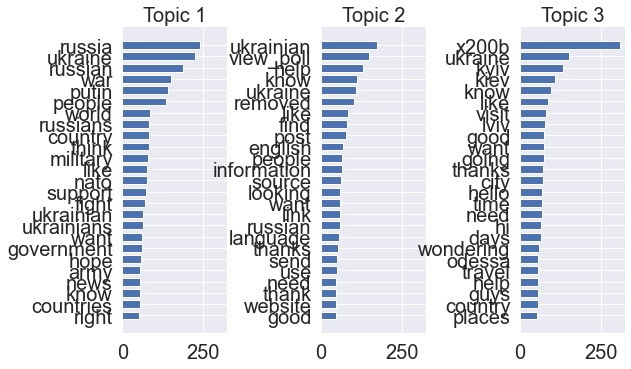

In [141]:
token_names = vectorizer.get_feature_names_out()
plot_top_words(lda, token_names, 25)
plt.show()

## 4.2 Topic Weights Across Documents

In [142]:
topic_distributions = lda.transform(tfidf)

In [143]:
print(tfidf.shape)
print(topic_distributions.shape)
print(topic_distributions)

(11956, 5000)
(11956, 3)
[[0.64498068 0.16720782 0.1878115 ]
 [0.07858268 0.08006884 0.84134847]
 [0.07518013 0.07411288 0.85070699]
 ...
 [0.05283314 0.27482074 0.67234611]
 [0.70801917 0.11249891 0.17948192]
 [0.74120991 0.12945438 0.12933571]]


In [145]:
# Generic topic names
columns = [
    "Topic 1",
    "Topic 2",
    "Topic 3"
]

# Or, choose topics
columns = [
    "Russia in Ukraine",
    "Help Posts",
    "Questions about Ukraine"
]

In [146]:
topic_df = pd.DataFrame(topic_distributions, columns=columns)
topic_df.head()

,Russia in Ukraine,Help Posts,Questions about Ukraine
0,0.644981,0.167208,0.187812
1,0.078583,0.080069,0.841348
2,0.075180,0.074113,0.850707
3,0.090670,0.413955,0.495375
4,0.068126,0.846291,0.085583


In [147]:
topic_df.insert(loc=0, column='text', value=ukraine['selftext'])
topic_df.head()

,text,Russia in Ukraine,Help Posts,Questions about Ukraine
0,Seems quiet.,0.644981,0.167208,0.187812
1,I have stayed 70 days and then 80 days out of ...,0.078583,0.080069,0.841348
2,Hi everyone. I'd like to visit Ukraine for th...,0.075180,0.074113,0.850707
3,had a friend who moved to my town ~4-5 years a...,0.090670,0.413955,0.495375
4,Hey /r/ukraine! I am trying to connect with m...,0.068126,0.846291,0.085583


In [148]:
idxs = [1, 2, 3]

for idx in idxs:
    print(topic_df['text'].iloc[idx][:500])
    print(topic_df.iloc[idx, 1:])
    print('----')

I have stayed 70 days and then 80 days out of 180 days.  I know Borispol is pretty strict about checking ones passport.  Is Simferopol airport less strict or is it better to use the land border crossing by Lviv into Poland?
Russia in Ukraine          0.078583
Help Posts                 0.080069
Questions about Ukraine    0.841348
Name: 1, dtype: object
----
Hi everyone.  I'd like to visit Ukraine for the first time.  I'm looking for some cheap tickets from Seoul->Kiev->Seoul from June 9 to June 25, 2011 (I'm flexible, but I have to be back in Seoul by June 25/26).

Could you please suggest the cheapest way to fly?

Thanks in advance!
Russia in Ukraine           0.07518
Help Posts                 0.074113
Questions about Ukraine    0.850707
Name: 2, dtype: object
----
had a friend who moved to my town ~4-5 years ago.
he has a myspace but it has not been accessed in a LONG time.

he used to have a mail.ru email, and played some drugswars.ru game or something lol

hes from kiev. wondering

## 4.3 Change or increase the number of topics from 3 to 5

In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer
ukraine = pd.read_csv('ukraine_lemmas.csv')
X = ukraine['lemmas']
# Vectorize, using only the top 5000 TF-IDF values
vectorizer = TfidfVectorizer(max_features=5000)

tfidf =  vectorizer.fit_transform(X)

In [150]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5, max_iter=20, random_state=1)
lda = lda.fit(tfidf)

In [151]:
#Defining the fuction
def plot_top_words(model, feature_names, n_top_words=10, n_row=1, n_col=5, normalize=False):
    """Plot the top words for an LDA model.
    
    Parameters
    ----------
    model : LatentDirichletAllocation object
        The trained LDA model.
    feature_names : list
        A list of strings containing the feature names.
    n_top_words : int
        The number of top words to show for each topic.
    n_row : int
        The number of rows to use in the subplots.
    n_col : int
        The number of columns to use in the subplots.
    normalize : bool
        If True, normalizes the topic model weights.
    """
    fig, axes = plt.subplots(n_row, n_col, figsize=(3 * n_col, 5 * n_row), sharex=True)
    axes = axes.flatten()
    components = model.components_
    if normalize:
        components = components / components.sum(axis=1)[:, np.newaxis]

    for topic_idx, topic in enumerate(components):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 20})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)

        for i in "top right left".split():
            ax.spines[i].set_visible(False)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)

    return fig, axes

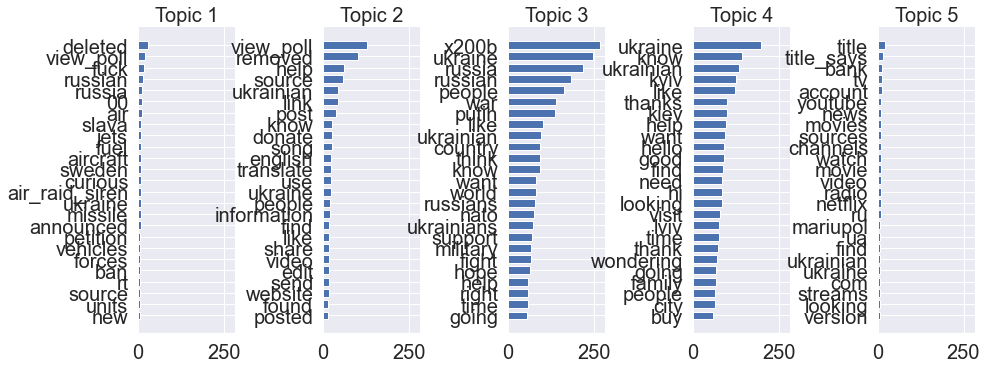

In [152]:
token_names = vectorizer.get_feature_names_out()
plot_top_words(lda, token_names, 25)
plt.show()

## 4.4 Cosine Similarity or Simialr Documents/Posts

In [185]:
doc_idx = 160

In [186]:
ukraine['selftext'].iloc[doc_idx]

"Why the Police keeps supporting the Government, don't they have a mind of their own? I don't know much of this situation, but this is a question that strikes me as fast as any sort of riot occurs."

In [187]:
from sklearn.metrics.pairwise import cosine_similarity
similarities = cosine_similarity(tfidf)
similarities.shape

(11956, 11956)

In [188]:
similar_df = pd.DataFrame({
    'text': ukraine['selftext'].values,
    'score': similarities[doc_idx]}).sort_values('score', ascending=False)

In [189]:
similar_df['text'].iloc[0]

"Why the Police keeps supporting the Government, don't they have a mind of their own? I don't know much of this situation, but this is a question that strikes me as fast as any sort of riot occurs."

In [190]:
similar_df['text'].iloc[1]

"What else or who's support do we need to disconnect Russia from SWIFT? Germany and Italy who were against now supporting but I don't understand what keeps the world from disconnecting now?"

# 5 Word Embeddings

## 5.1 Data Preprocessing

In [191]:
# Package imports
import os
import pandas as pd
import pickle

In [192]:
!pwd

/Users/nazmulahasan/Desktop/Professional/Data Science Course/Data-Science-Social-Justice-main/data


In [195]:
# Import dataset
df = pd.read_csv('ukraine.csv')
df.head(3)
print(df.shape)

(88764, 18)


In [196]:
# Remove comments that are [removed] or [deleted]
df = df[~df['selftext'].isin(['[removed]', '[deleted]'])].dropna(subset=['selftext'])
# Remove comments less than 15 characters long
df = df[df['selftext'].str.len() >= 15]
len(df)

16550

In [197]:
import spacy
nlp = spacy.load('en_core_web_sm')
from gensim.models.phrases import Phrases, Phraser

In [198]:
# remove 'selftext' posts that have language other than English
df = df[df['selftext'].map(lambda x: x.isascii())]

In [199]:
#remove URLs from 'title' and 'selftext' columns 
df['title'] = df['title'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df['selftext'] = df['selftext'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

In [200]:
#removing smart apostrophes (’) with straight apostrophes (')

df['selftext'] = df['selftext'].str.replace(r"[\’]", r"'")
df['title'] = df['title'].str.replace(r"[\’]", r"'")

/var/folders/t_/t2ccj0g529gcsgmcxnsjjft00000gn/T/ipykernel_41164/1658922611.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['selftext'] = df['selftext'].str.replace(r"[\’]", r"'")
/var/folders/t_/t2ccj0g529gcsgmcxnsjjft00000gn/T/ipykernel_41164/1658922611.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace(r"[\’]", r"'")


In [201]:
len(df)

12324

In [202]:
def clean(token):
    """Helper function that specifies whether a token is:
        - punctuation
        - space
        - digit
    """
    return token.is_punct or token.is_space or token.is_digit

def line_read(df, text_col='selftext'):
    """Generator function to read in text from df and get rid of line breaks."""    
    for text in df[text_col]:
        yield text.replace('\n', '')

def preprocess(df, text_col='selftext', allowed_postags=['NOUN', 'ADJ']):
    """Preprocessing function to apply to a dataframe."""
    for parsed in nlp.pipe(line_read(df, text_col), batch_size=1000, disable=["tok2vec", "ner"]):
        # Gather lowercased, lemmatized tokens
        tokens = [token.lemma_.lower() if token.lemma_ != '-PRON-'
                  else token.lower_ 
                  for token in parsed if not clean(token)]
        # Remove specific lemmatizations, and words that are not nouns or adjectives
        tokens = [lemma
                  for lemma in tokens
                  if not lemma in ["'s",  "’s", "’"] and not lemma in allowed_postags]
        # Remove stop words
        tokens = [token for token in tokens if token not in spacy.lang.en.stop_words.STOP_WORDS]
        yield tokens

In [203]:
docs = [line for line in preprocess(df, text_col='selftext')]

In [204]:
# Create bigram model: pass docs into Phrases class
bigrams = Phrases(docs, min_count=20, threshold=300)
# Create a "frozen" bigram model using the Phraser class
bigram_phraser = Phraser(bigrams)
# Now, create bigrams 
docs_bigrams = [bigram_phraser[doc] for doc in docs]

In [205]:
trigrams = Phrases(bigrams[docs], min_count=20, threshold=100)  
trigram_phraser = Phraser(trigrams)
docs_trigrams = [trigram_phraser[doc] for doc in docs_bigrams]

In [206]:
# Let's save the data to an external JSON file:

import json
with open('aita_com_top_lemmas.json', 'w') as write:
    json.dump(docs_trigrams, write)
# Opening the same file works as follows:
with open("aita_com_top_lemmas.json") as f:
    trigrams = json.load(f)

## 5.2 Constructing a Word2Vec Model

In [207]:
from gensim.models import Word2Vec
import multiprocessing

In [208]:
# Count the number of cores you have at your disposal
cores = multiprocessing.cpu_count()
# Word vector dimensionality (how many features each word will be given)
n_features = 300
# Minimum word count to be taken into account
min_word_count = 10
# Number of threads to run in parallel (equal to your amount of cores)
n_workers = cores
# Context window size
window = 5
# Downsample setting for frequent words
downsampling = 1e-2
# Seed for the random number generator (to create reproducible results)
seed = 1 
# Skip-gram = 1, CBOW = 0
sg = 1
epochs = 20

model = Word2Vec(
    sentences=trigrams,
    workers=n_workers,
    vector_size=n_features,
    min_count=min_word_count,
    window=window,
    sample=downsampling,
    seed=seed,
    sg=sg)

In [209]:
model.train(trigrams, total_examples=model.corpus_count, epochs=10)        

(3427620, 4006440)

In [210]:
model.save('ukraine.emb')

In [211]:
model = Word2Vec.load('ukraine.emb')

In [212]:
len(model.wv)

4935

In [218]:
model.wv.index_to_key[0]

'ukraine'

In [219]:
model.wv.vectors[0]

array([ 0.01779329,  0.12080725, -0.19491732,  0.06865217, -0.29927978,
       -0.19683605,  0.18372746,  0.5541464 , -0.08819015, -0.01207806,
        0.08237945, -0.09730758,  0.13582797,  0.06197258, -0.19829524,
       -0.1987237 , -0.02824419,  0.17717212, -0.23350757, -0.13082153,
        0.06260913,  0.2319053 ,  0.2432239 ,  0.10642673,  0.15729159,
       -0.02858473, -0.1611061 , -0.00892535, -0.01603978, -0.14228402,
       -0.3096808 , -0.21068752,  0.21680501, -0.01343668,  0.14352739,
       -0.15382552,  0.05182152, -0.2596679 , -0.01784389, -0.19840877,
       -0.27630973,  0.21187401,  0.01527106, -0.01551248,  0.05523182,
        0.09989759, -0.12597418,  0.13330568, -0.03541898,  0.14369476,
       -0.18399993, -0.15721172, -0.40050435,  0.03012764,  0.17355175,
       -0.18911684,  0.16563644, -0.0778844 ,  0.12624964,  0.25383934,
       -0.1605854 ,  0.04197513, -0.04975099, -0.107149  ,  0.15463895,
        0.0280114 , -0.17829038,  0.06092393, -0.1289486 ,  0.18

## Word Similarity

In [220]:
def get_most_similar_terms(model, token, topn=20):
    """Look up the top N most similar terms to the token."""
    for word, similarity in model.wv.most_similar(positive=[token], topn=topn):
        print(f"{word}: {round(similarity, 3)}")

In [222]:
get_most_similar_terms(model, 'russia')

wwiii: 0.512
aggressor: 0.512
demands: 0.503
agrees: 0.501
pathetic: 0.487
iran: 0.485
halt: 0.482
punish: 0.46
establish: 0.457
weaken: 0.456
sanctioned: 0.455
escalating: 0.455
objectives: 0.455
commit: 0.451
invading: 0.451
merely: 0.448
buffer: 0.448
threaten: 0.447
invades: 0.446
memorandum: 0.445


In [223]:
get_most_similar_terms(model, 'ukraine')

aggressor: 0.541
pretext: 0.527
threaten: 0.526
weaken: 0.525
punish: 0.516
begging: 0.515
palestine: 0.515
justify: 0.514
unprovoked: 0.51
ukraina: 0.497
liberate: 0.497
sovereignty: 0.495
moves: 0.493
liberty: 0.491
promises: 0.484
imminent: 0.479
dictatorship: 0.479
territorial: 0.478
fights: 0.478
reforms: 0.477


In [229]:
get_most_similar_terms(model, 'nato')

fly_zone: 0.582
intervene: 0.543
alliance: 0.539
ww3: 0.534
ally: 0.505
intervention: 0.503
pretext: 0.498
wwiii: 0.494
nuclear_weapons: 0.49
membership: 0.49
agrees: 0.478
bluff: 0.475
bordering: 0.468
baltic: 0.466
provoke: 0.466
european_union: 0.463
baltics: 0.461
buffer: 0.459
decides: 0.458
threat: 0.458


In [224]:
get_most_similar_terms(model, 'putin')

lunatic: 0.526
russophobia: 0.504
justification: 0.503
dare: 0.502
wwiii: 0.492
escalating: 0.48
coup: 0.479
fascist: 0.479
bully: 0.476
committing: 0.472
bs: 0.47
lie: 0.462
madness: 0.461
dictatorship: 0.458
nuke: 0.457
regime: 0.455
dick: 0.454
delusional: 0.451
rhetoric: 0.449
xi: 0.449


In [226]:
get_most_similar_terms(model, 'zelenskyy')

comedian: 0.659
volodymyr: 0.652
actor: 0.617
rant: 0.608
presidential: 0.605
elected: 0.603
zelensky: 0.592
politician: 0.59
votes: 0.588
inspiring: 0.587
communists: 0.571
broadcast: 0.568
tymoshenko: 0.563
speech: 0.558
zelenskiy: 0.549
offended: 0.544
appeared: 0.543
presidents: 0.542
poroshenko: 0.542
vladimir: 0.54


In [227]:
get_most_similar_terms(model, 'nuke')

wwiii: 0.746
escalating: 0.726
bluff: 0.723
lunatic: 0.696
bs: 0.679
resulting: 0.678
dare: 0.678
loses: 0.673
bully: 0.664
escalates: 0.66
ww3: 0.654
avoided: 0.651
xi: 0.651
commit: 0.65
threaten: 0.649
ccp: 0.645
tactic: 0.641
rhetoric: 0.639
confrontation: 0.637
bunker: 0.633


## Word Analogy

In [232]:
# Russia : Aggressor :: Ukraine : ?

model.wv.most_similar(positive=['ukraine', 'aggressor'], negative='russia')

[('unprovoked', 0.5437472462654114),
 ('pretext', 0.5252885818481445),
 ('bow', 0.5241587162017822),
 ('threaten', 0.5169386863708496),
 ('catastrophe', 0.51632159948349),
 ('peacekeeping', 0.49962854385375977),
 ('capabilities', 0.4964183270931244),
 ('capable', 0.49336519837379456),
 ('weaken', 0.4891851544380188),
 ('protestors', 0.4884728789329529)]

## Clustering Word Vectors

In [233]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KDTree

In [234]:
def clustering_on_wordvecs(word_vecs, n_clusters):
    """Clusters a set of word vectors and returns the center of each cluster."""
    # Initalize a k-means object and use it to extract centroids
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++')
    cluster_ids = kmeans.fit_predict(word_vecs)
    return kmeans.cluster_centers_, cluster_ids

In [241]:
n_clusters = 20
centers, cluster_ids = clustering_on_wordvecs(model.wv.vectors, n_clusters)
centroid_map = dict(zip(model.wv.index_to_key, centers))

In [239]:
def get_top_words(model, n_closest, centers):
    """Get the words closest to each cluster center."""
    # Create KD Tree
    tree = KDTree(model.wv.vectors)
    # Use closest points for each cluster center to query the closest points to it
    closest_points = tree.query(centers, k=n_closest)[1]
    # Query word index for each position
    closest_words = {}
    for cluster_idx, cluster in enumerate(closest_points):
        closest_words[f'Cluster {cluster_idx + 1}'] = [model.wv.index_to_key[idx] for idx in cluster]
    # Create DataFrame from dictionary
    df = pd.DataFrame(closest_words)
    return df

In [242]:
get_top_words(model, 50, centers)

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11,Cluster 12,Cluster 13,Cluster 14,Cluster 15,Cluster 16,Cluster 17,Cluster 18,Cluster 19,Cluster 20
0,x200b;*processing_video,view_poll,view_poll,view_poll,sam,view_poll,admission,cousins,28th,view_poll,customers,cloud,wet,view_poll,view_poll,view_poll,relax,countrymen,flooded,view_poll
1,trapped,entirety,boris,establish,jet,x200b;*processing_video,renew,hello!i,30th,pronounced,currencies,marked,thermal,aiming,x200b;*processing_video,x200b;*processing_video,boring,view_poll,view_poll,x200b;*processing_video
2,approaching,demonstrations,offense,agrees,battlefield,federal,travels,view_poll,kiyv,mistakes,transaction,publish,pour,x200b;*processing_video,overwhelmed,lift,hanging,stake,floating,overwhelmed
3,kilometers,revenge,presidents,weaken,columns,reuters,vaccines,yo,duration,formatting,pickup,stored,dump,outsiders,directed,aiming,romantic,aggressors,flood,rolling
4,saboteurs,boris,literal,escalates,frontline,selected,printed,chicago,8th,combination,alternatives,floating,rip,elaborate,expertise,overwhelmed,filmed,patriotism,detailed,spin
5,view_poll,x200b;*processing_video,actors,decisions,logistical,contracts,enforced,occasion,skip,portuguese,scammed,view_poll,filling,hints,aiming,luckily,beers,stood,mentioning,halt
6,lined,acknowledge,tymoshenko,punish,paratroopers,broadcast,checks,x200b;*processing_video,jan,practicing,ordering,continuously,lighter,depth,monetary,deleted][view_poll,pleasant,bow,x200b;*processing_video,literal
7,incidents,agrees,totalitarian,promises,saboteurs,ambassador,pfizer,reside,vienna,grammar,delivers,propoganda,strip,candidates,concept,removed][view_poll,fantastic,cry,propoganda,gains
8,overwhelmed,overwhelmed,x200b;*processing_video,merely,halt,boris,biometric,florida,scheduled,literature,view_poll,charging,string,overwhelmed,maintaining,outsiders,entertainment,selfish,collage,logistical
9,subway,establish,conservative,boris,defenses,directed,validity,helloi,lined,accent,altogether,redirect,pattern,ya,recruit,awhile,lunch,utter,formatting,demonstrations


## Visualizing High Dimensional Spaces with  𝑡 -SNE

In [243]:
from sklearn.manifold import TSNE

In [244]:
# Create some filepaths to save our model
tsne_path = 'tsne_model'
tsne_vectors_path = 'tsne_vectors.pkl'

In [245]:
tsne = TSNE(init='pca', learning_rate='auto')
tsne_vectors = tsne.fit_transform(model.wv.vectors)

/Users/nazmulahasan/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [246]:
# Store the t-SNE vectors
tsne_vectors = pd.DataFrame(tsne_vectors,
                            index=pd.Index(model.wv.index_to_key),
                            columns=['x', 'y'])

In [247]:
with open(tsne_path, 'wb') as f:
    pickle.dump(tsne, f)

tsne_vectors.to_pickle(tsne_vectors_path)

In [248]:
with open(tsne_path, 'rb') as f:
    tsne = pickle.load(f)
    
tsne_vectors = pd.read_pickle(tsne_vectors_path)

In [250]:
!pip install bokeh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 6.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.2/192.2 KB 3.9 MB/s eta 0:00:00a 0:00:01


In [251]:
import bokeh
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource

output_notebook()
bokeh.io.output_notebook()

Loading BokehJS ...

Loading BokehJS ...

In [252]:
# Add our DataFrame as a ColumnDataSource for Bokeh
plot_data = ColumnDataSource(tsne_vectors)

# Create the plot and configure the title, dimensions, and tools
tsne_plot = figure(title='t-SNE Word Embeddings',
                   plot_width=800,
                   plot_height=800)

# Add a hover tool to display words on roll-over
tsne_plot.add_tools(HoverTool(tooltips='@index') )

# Draw the words as circles on the plot
tsne_plot.circle('x', 'y',
                 source=plot_data,
                 color='blue',
                 line_alpha=0.2,
                 fill_alpha=0.1,
                 size=10,
                 hover_line_color='black')

# Configure visual elements of the plot
tsne_plot.xaxis.visible = False
tsne_plot.yaxis.visible = False
tsne_plot.grid.grid_line_color = None
tsne_plot.outline_line_color = None

# Engage!
show(tsne_plot)